# Q-Q Plots

## Preparation


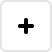
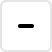
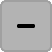
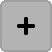
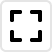
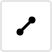
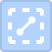
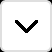
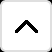
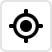

In [1]:
import pandas as pd
from scipy.stats import norm, skewnorm, laplace, uniform

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(df.shape)
sample_target_column = "hwy"
x_target_column = "cty"
grouping_column = "drv"
print("Target column: {0}\nGrouping column: {1}".format(sample_target_column, grouping_column))
df.head()

(234, 12)
Target column: hwy
Grouping column: drv


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
n = 1_000
norm_df = pd.DataFrame({"y": norm.rvs(size=n, random_state=42)})
skewed_df = pd.DataFrame({"y": skewnorm.rvs(7, size=n, random_state=42)})
neg_kurtosis_df = pd.DataFrame({"y": uniform.rvs(size=n, random_state=42)})
pos_kurtosis_df = pd.DataFrame({"y": laplace.rvs(size=n, random_state=42)})

## Default plots

In [5]:
ggplot(df, aes(sample=sample_target_column)) + \
    geom_qq() + geom_qq_line() + \
    ggtitle("Sample vs. theoretical distributions")

In [6]:
ggplot(df, aes(x=x_target_column, y=sample_target_column)) + \
    geom_qq2() + geom_qq2_line() + \
    ggtitle("Comparison of two columns")

## Deviations investigation

In [7]:
p1 = ggplot(norm_df)
p11 = p1 + geom_histogram(aes(x="y")) + ggtitle("Normal: histogram")
p12 = p1 + geom_qq(aes(sample="y")) + geom_qq_line(aes(sample="y")) + ggtitle("Normal: Q-Q plot")
p2 = ggplot(skewed_df)
p21 = p2 + geom_histogram(aes(x="y")) + ggtitle("Skewed: histogram")
p22 = p2 + geom_qq(aes(sample="y")) + geom_qq_line(aes(sample="y")) + ggtitle("Skewed: Q-Q plot")
p3 = ggplot(neg_kurtosis_df)
p31 = p3 + geom_histogram(aes(x="y")) + ggtitle("-Kurtosis: histogram")
p32 = p3 + geom_qq(aes(sample="y")) + geom_qq_line(aes(sample="y")) + ggtitle("-Kurtosis: Q-Q plot")
p4 = ggplot(pos_kurtosis_df)
p41 = p4 + geom_histogram(aes(x="y")) + ggtitle("+Kurtosis: histogram")
p42 = p4 + geom_qq(aes(sample="y")) + geom_qq_line(aes(sample="y")) + ggtitle("+Kurtosis: Q-Q plot")

plot_matrix([p11, p12, p21, p22, p31, p32, p41, p42])

## Choose a distribution

In [8]:
p1 = ggplot(df, aes(sample=sample_target_column)) + \
    geom_qq(distribution="norm") + \
    geom_qq_line(distribution="norm", quantiles=[.1, .9]) + \
    ggtitle("Normal distribution")
p2 = ggplot(df, aes(sample=sample_target_column)) + \
    geom_qq(distribution="uniform") + \
    geom_qq_line(distribution="uniform", quantiles=[.1, .9]) + \
    ggtitle("Uniform distribution")
p3 = ggplot(df, aes(sample=sample_target_column)) + \
    geom_qq(distribution="t") + \
    geom_qq_line(distribution="t", quantiles=[.1, .9]) + \
    ggtitle("Student's t-distribution distribution")
p4 = ggplot(df, aes(sample=sample_target_column)) + \
    geom_qq(distribution="exp") + \
    geom_qq_line(distribution="exp", quantiles=[.1, .9]) + \
    ggtitle("Exponential distribution")

plot_matrix([p1, p2, p3, p4])

## Q-Q stats with other geometries

In [9]:
ggplot(df, aes(x=x_target_column, y=sample_target_column, color=grouping_column)) + \
    geom_line(stat="qq2") + \
    geom_point(stat="qq2") + \
    geom_line(stat="qq2_line", color="black") + \
    facet_grid(x=grouping_column)